In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
%reset
import warnings
warnings.filterwarnings('ignore')
#from __future__ import print_function
from numpy import *
from scipy import *
from scipy import stats
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import scipy as sp
import cmocean
import glob
import seawater
""
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools
)

%matplotlib inline


Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
orig = 'tr_northDICTAOXY.nc'
doss = 'Dosser_north_TEOS10.nc'
tdir ='/data/tjarniko/MEOPAR/tracers/north/'
north_bdy = nc.Dataset('/data/tjarniko/MEOPAR/tracers/north/tr_northDICTAOXY.nc')
bc_Haley = nc.Dataset(tdir + doss)


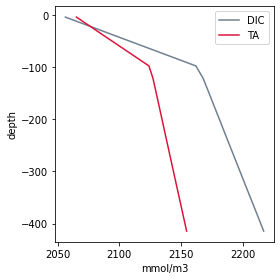

In [4]:

DIC_t = north_bdy['DIC'][0,:,0,0]
TA_t = north_bdy['TA'][0,:,0,0]
deptht = north_bdy['deptht'][:]
# print(deptht)
# print(DIC)
# print(TA)
fig = plt.figure(figsize=(4,4))
nop = 6
for i in range(1,nop+1):
    if i == 1:
        ax = fig.add_subplot(1,1,i)
        ax.plot(DIC_t,-deptht,color = 'slategray',label = 'DIC')
        ax.plot(TA_t,-deptht, color = 'crimson', label = 'TA')
        ax.set_ylabel('depth')
        ax.set_xlabel('mmol/m3')
        ax.legend()

fig.tight_layout()


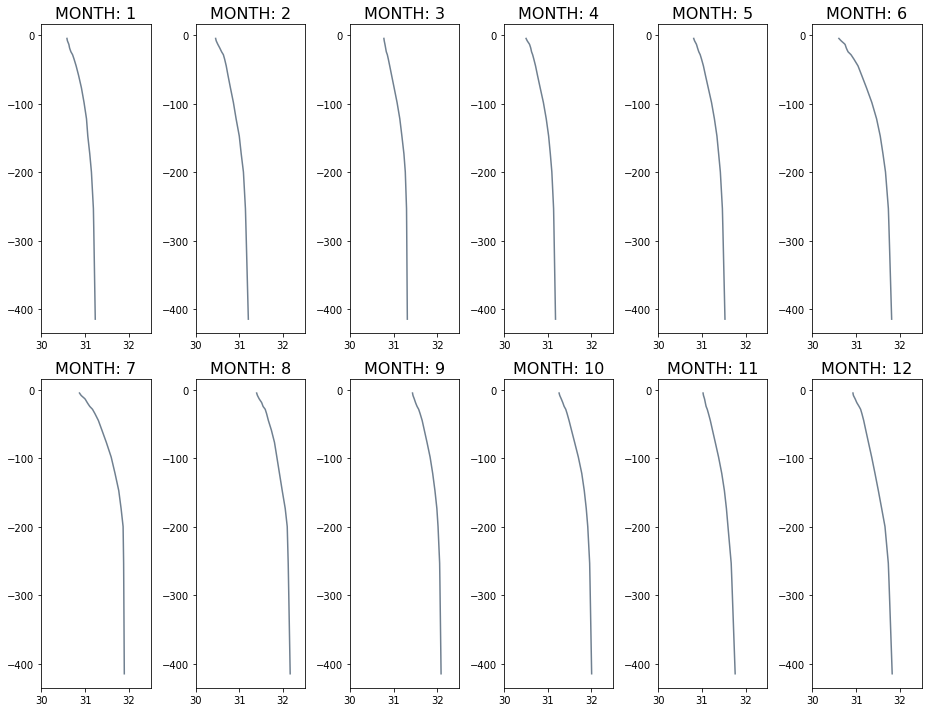

In [5]:
fig = plt.figure(figsize=(13,10))
nop = 12

dep = bc_Haley.variables['deptht'][:]
sal = bc_Haley.variables['vosaline']


ty = 15
tx = 5

for i in range(1,nop+1):
    ax = fig.add_subplot(2,nop/2,i)
    tsal = sal[i-1,:,tx,ty][:]
    dep = bc_Haley.variables['deptht'][:]
    ax.plot(tsal,-dep,color = 'slategray')
    ax.set_xlim([30,32.5])
    tit = 'MONTH: ' + str(i)
    ax.set_title(tit, fontsize = 16)
        
fig.tight_layout()


In [6]:
cols = ['#800000', '#e6194B', '#f58231', '#ffe119', '#bfef45',\
        '#3cb44b','#469990', '#42d4f4', '#4363d8', '#000075', '#911eb4', '#f032e6']
months = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']


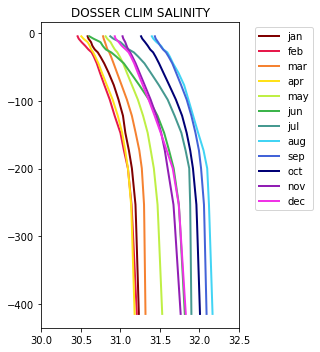

In [7]:

nop = 12

dep = bc_Haley.variables['deptht'][:]
sal = bc_Haley.variables['vosaline']


ty = 15
tx = 5
fig = plt.figure(figsize=(5,5))
for i in range(1,nop+1):
    ax = fig.add_subplot(1,1,1)
    tsal = sal[i-1,:,tx,ty][:]
    dep = bc_Haley.variables['deptht'][:]
    ax.plot(tsal,-dep,color = cols[i-1], label = months[i-1], linewidth = 2)
    ax.set_xlim([30,32.5])
    tit = 'MONTH: ' + str(i)
    ax.set_title('DOSSER CLIM SALINITY')
plt.legend(bbox_to_anchor=(1.4, 1.0))
        
fig.tight_layout()


In [8]:
infil = loadtxt('./JS.txt')

crid= infil[:,0]
ln = infil[:,2]
stn = infil[:,3]
mon = infil[:,4]
day = infil[:,5]
lat_or = infil[:,6]
lon_or = infil[:,7]
lat = infil[:,6]
lon = infil[:,7]
P = infil[:,8]
T = infil[:,9]
S = infil[:,10]
ox = infil[:,11]
ox_qf = infil[:,12]
dic = infil[:,13]
alk = infil[:,15]
dic_qf = infil[:,14]
alk_qf = infil[:,16]
no3 = infil[:,17]
no3_qf = infil[:,18]
si = infil[:,19]
si_qf = infil[:, 20]
po4 = infil[:,21]
po4_qf = infil[:, 22]

print(P)

[  1.5   4.5   9.8  20.   30.2  49.9  75.3 100.2 150.  200.4 250.3 395.7]


In [9]:
dens = seawater.dens(S,T,P)
dic_conv=dic*dens/1000
alk_conv=alk*dens/1000
S_rs = S * 35.16504/35

In [10]:

# nop = 12

# ty = 15
# tx = 5
# fig = plt.figure(figsize=(5,5))
# for i in range(1,2):
#     ax = fig.add_subplot(1,1,1)
#     ax.plot(S_rs,alk_conv,c='chartreuse', marker='o',label = 'TA',linestyle='None',markersize=5)
#     ax.plot(S_rs,dic_conv,c='fuchsia', marker='o',label = 'DIC',linestyle='None',markersize=5)
#     tit = 'MONTH: ' + str(i)
# plt.legend(bbox_to_anchor=(1.4, 1.0))
        
# fig.tight_layout()


42.62406567350401
835.5069210175448
r2 value dic 0.8166400102507638
p value dic 5.543418658068372e-05
r2 value ta 0.6164397823037345
p value ta 0.002482328154290045


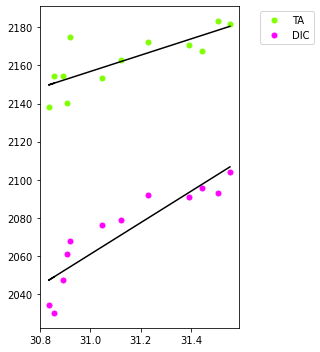

In [11]:
slopeDIC, interceptDIC, r_valueD, p_valueD, std_errD = stats.linregress(S_rs,dic_conv)
lineDIC = slopeDIC*S_rs+interceptDIC
slopeTA, interceptTA, r_valueT, p_valueT, std_errT = stats.linregress(S_rs,alk_conv)
lineTA = slopeTA*S_rs+interceptTA
print(slopeTA);print(interceptTA)
print('r2 value dic', r_valueD*r_valueD)
print('p value dic', p_valueD)
print('r2 value ta', r_valueT*r_valueT)
print('p value ta', p_valueT)


nop = 12

ty = 15
tx = 5
fig = plt.figure(figsize=(5,5))
for i in range(1,2):
    ax = fig.add_subplot(1,1,1)
    ax.plot(S_rs,alk_conv,c='chartreuse', marker='o',label = 'TA',linestyle='None',markersize=5)
    ax.plot(S_rs,dic_conv,c='fuchsia', marker='o',label = 'DIC',linestyle='None',markersize=5)

    ax.plot(S_rs,lineTA,'-k')
    ax.plot(S_rs,lineDIC,'-k')

    tit = 'MONTH: ' + str(i)
plt.legend(bbox_to_anchor=(1.4, 1.0))
        
fig.tight_layout()


In [12]:
sal = bc_Haley.variables['vosaline'][:]
dic_bc = slopeDIC*sal+interceptDIC
ta_bc = slopeTA*sal+interceptTA

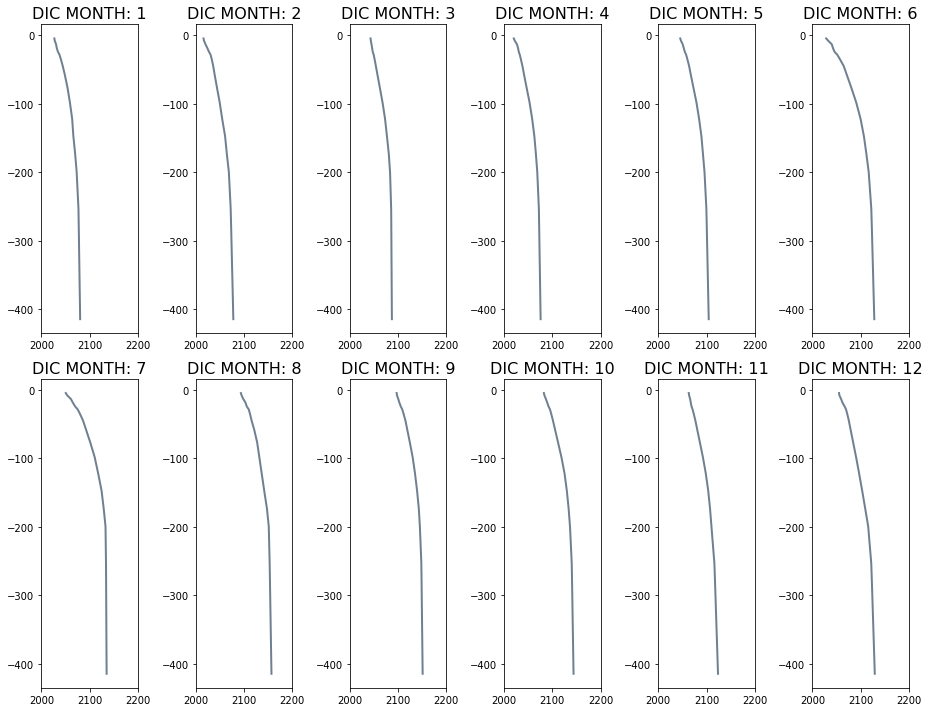

In [13]:
fig = plt.figure(figsize=(13,10))
nop = 12

dep = bc_Haley.variables['deptht'][:]
sal = bc_Haley.variables['vosaline']


ty = 15
tx = 5

for i in range(1,nop+1):
    ax = fig.add_subplot(2,nop/2,i)
    tdic = dic_bc[i-1,:,tx,ty][:]
    dep = bc_Haley.variables['deptht'][:]
    ax.plot(tdic,-dep,color = 'slategray', linewidth = 2)
    ax.set_xlim([2000,2200])
    tit = 'DIC MONTH: ' + str(i)
    ax.set_title(tit, fontsize = 16)
        
fig.tight_layout()


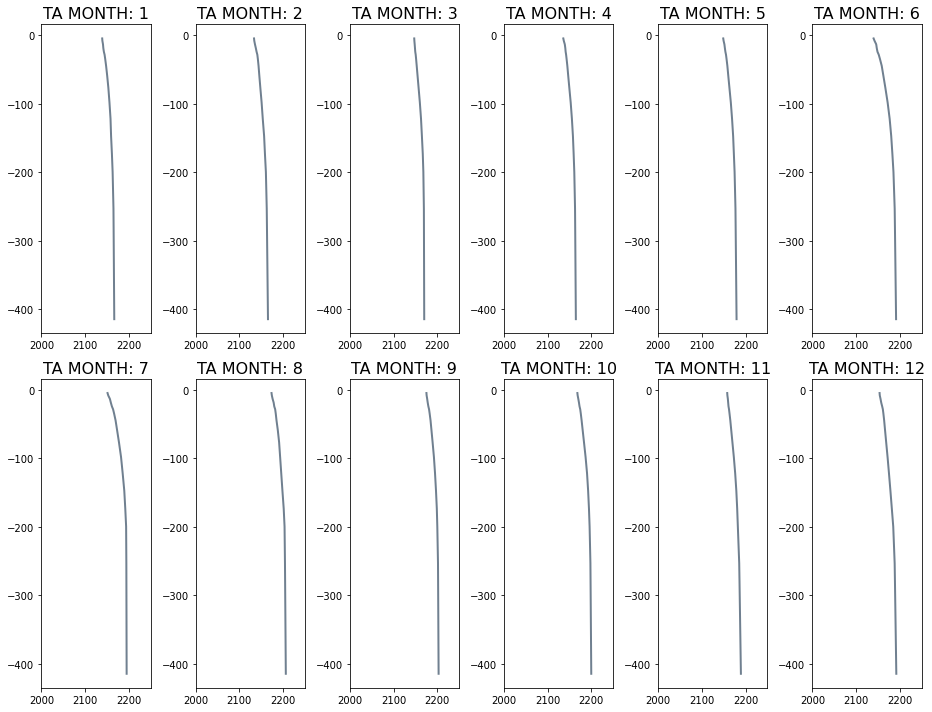

In [14]:
fig = plt.figure(figsize=(13,10))
nop = 12

dep = bc_Haley.variables['deptht'][:]
sal = bc_Haley.variables['vosaline']


ty = 15
tx = 5

for i in range(1,nop+1):
    ax = fig.add_subplot(2,nop/2,i)
    tdic = ta_bc[i-1,:,tx,ty][:]
    dep = bc_Haley.variables['deptht'][:]
    ax.plot(tdic,-dep,color = 'slategray', linewidth = 2)
    ax.set_xlim([2000,2250])
    tit = 'TA MONTH: ' + str(i)
    ax.set_title(tit, fontsize = 16)
        
fig.tight_layout()


In [15]:

# nop = 12

# dep = bc_Haley.variables['deptht'][:]
# sal = bc_Haley.variables['vosaline']


# ty = 15
# tx = 5
# fig = plt.figure(figsize=(5,5))
# for i in range(1,nop+1):
#     ax = fig.add_subplot(1,1,1)
#     tdic = dic_bc[i-1,:,tx,ty][:]
#     dep = bc_Haley.variables['deptht'][:]
#     ax.plot(tdic,-dep,color = cols[i-1], label = months[i-1], linewidth = 2)
    
#     #ax.set_xlim([30,32.5])
#     tit = 'MONTH: ' + str(i)
# ax.plot(DIC,-deptht,color = 'slategray',label = 'OLD DIC', linewidth = 2)
# ax.set_xlim([2000,2250])
# plt.legend(bbox_to_anchor=(1.4, 1.0))
        
# fig.tight_layout()


In [16]:

# nop = 12

# dep = bc_Haley.variables['deptht'][:]
# sal = bc_Haley.variables['vosaline']


# ty = 15
# tx = 5
# fig = plt.figure(figsize=(5,5))
# for i in range(1,nop+1):
#     ax = fig.add_subplot(1,1,1)
#     tta = ta_bc[i-1,:,tx,ty][:]
#     dep = bc_Haley.variables['deptht'][:]
#     ax.plot(tta,-dep,color = cols[i-1], label = months[i-1], linewidth = 2)
    
#     #ax.set_xlim([30,32.5])
#     tit = 'MONTH: ' + str(i)
# ax.plot(TA,-deptht,color = 'slategray',label = 'OLD TA', linewidth = 2)
# plt.legend(bbox_to_anchor=(1.4, 1.0))
# ax.set_xlim([2000,2250])
        
# fig.tight_layout()


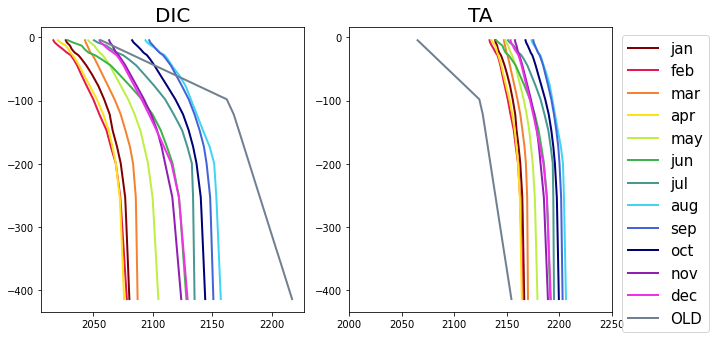

In [17]:

nop = 12

dep = bc_Haley.variables['deptht'][:]
sal = bc_Haley.variables['vosaline']


ty = 15
tx = 5
fig = plt.figure(figsize=(10,5))
for j in range(1,3):
    if j == 1:
        ax = fig.add_subplot(1,2,j)
        for i in range(1,nop+1):

            tdic = dic_bc[i-1,:,tx,ty][:]
            dep = bc_Haley.variables['deptht'][:]
            ax.plot(tdic,-dep,color = cols[i-1], label = months[i-1], linewidth = 2)

            #ax.set_xlim([30,32.5])
            tit = 'MONTH: ' + str(i)
        ax.plot(DIC_t,-deptht,color = 'slategray', linewidth = 2)
        ax.set_title('DIC', fontsize = 20)
    if j == 2:
        ax = fig.add_subplot(1,2,j)
        for i in range(1,nop+1):

            tta = ta_bc[i-1,:,tx,ty][:]
            dep = bc_Haley.variables['deptht'][:]
            ax.plot(tta,-dep,color = cols[i-1], label = months[i-1], linewidth = 2)

            #ax.set_xlim([30,32.5])
            tit = 'MONTH: ' + str(i)
        ax.plot(TA_t,-deptht,color = 'slategray',label = 'OLD', linewidth = 2)
        ax.set_title('TA', fontsize = 20)
plt.legend(bbox_to_anchor=(1.4, 1.0), fontsize = 15)
ax.set_xlim([2000,2250])
        
fig.tight_layout()


In [18]:
# dsin = bc_Haley

# #output file
# ncname = 'Dosser_north_TEOS10_DICTA.nc'
# dsout = nc.Dataset(ncname, "w", format="NETCDF4")
# #Copy dimensions
# for dname, the_dim in dsin.dimensions.items():
#     print(dname)
#     print(len(the_dim))
#     dsout.createDimension(dname, len(the_dim) if not the_dim.isunlimited() else None)
# # Copy variables
# for v_name, varin in dsin.variables.items():
#     outVar = dsout.createVariable(v_name, varin.datatype, varin.dimensions)
#     print(varin.datatype)
    
#     # Copy variable attributes
#     outVar.setncatts({k: varin.getncattr(k) for k in varin.ncattrs()})
    
#     outVar[:] = varin[:]

In [19]:
# DIC = dsout.createVariable('DIC',np.float32,('time_counter','deptht','yb','xbT'))
# TA = dsout.createVariable('TA',np.float32,('time_counter','deptht','yb','xbT'))

In [20]:
# DIC[:] = dic_bc
# TA[:] = ta_bc

In [21]:
# dsout.close()

In [22]:
w = nc.Dataset('./Dosser_north_TEOS10_DICTA.nc')



FileNotFoundError: [Errno 2] No such file or directory: b'./Dosser_north_TEOS10_DICTA.nc'

In [ ]:
d = w.variables['DIC']

## check writing of BCs to new file

In [ ]:
print(d)


In [ ]:

nop = 12

dep = w.variables['deptht'][:]
sal = w.variables['vosaline'][:]
dic_bc = w.variables['DIC'][:]
ta_bc = w.variables['TA'][:]

ty = 15
tx = 5
fig = plt.figure(figsize=(10,5))
for j in range(1,3):
    if j == 1:
        ax = fig.add_subplot(1,2,j)
        for i in range(1,nop+1):

            tdic = dic_bc[i-1,:,tx,ty][:]
            dep = bc_Haley.variables['deptht'][:]
            ax.plot(tdic,-dep,color = cols[i-1], label = months[i-1], linewidth = 2)

            #ax.set_xlim([30,32.5])
            tit = 'MONTH: ' + str(i)
        ax.plot(DIC_t,-deptht,color = 'slategray', linewidth = 2)
        ax.set_title('DIC, new BC file', fontsize = 20)
    if j == 2:
        ax = fig.add_subplot(1,2,j)
        for i in range(1,nop+1):

            tta = ta_bc[i-1,:,tx,ty][:]
            dep = bc_Haley.variables['deptht'][:]
            ax.plot(tta,-dep,color = cols[i-1], label = months[i-1], linewidth = 2)

            #ax.set_xlim([30,32.5])
            tit = 'MONTH: ' + str(i)
        ax.plot(TA_t,-deptht,color = 'slategray',label = 'OLD', linewidth = 2)
        ax.set_title('TA, new BC file', fontsize = 20)
plt.legend(bbox_to_anchor=(1.4, 1.0), fontsize = 15)
ax.set_xlim([2000,2250])
        
fig.tight_layout()


In [ ]:
w2 = nc.Dataset('/data/tjarniko/MEOPAR/tracers/north/bioOBC_North_monthlySiNO3.nc')
print(w2)